In [1]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\devia\Downloads\health care diabetes (2).csv'
data = pd.read_csv(file_path) 



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Replace zero values with NaN in specified columns
columns_with_missing_values = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_with_missing_values] = data[columns_with_missing_values].replace(0, np.nan)

In [3]:
# Calculate the balance of the data
outcome_counts = data['Outcome'].value_counts(normalize=True)
outcome_counts

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [4]:
# Fill missing values with the median of each column
data_filled = data.fillna(data.median())

In [5]:
# Select a subset of the data with filled missing values
subset_data = data_filled[['Glucose', 'BloodPressure', 'BMI', 'Age', 'Outcome']]

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
knn = KNeighborsClassifier()
log_reg = LogisticRegression(max_iter=1000)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)

# Train models
knn.fit(X_train_scaled, y_train)
log_reg.fit(X_train_scaled, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Calculate AUC for each model
knn_auc = roc_auc_score(y_test, knn.predict_proba(X_test_scaled)[:, 1])
log_reg_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
decision_tree_auc = roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:, 1])
random_forest_auc = roc_auc_score(y_test, random_forest.predict_proba(X_test)[:, 1])

# Compile results
model_results = {
    'KNN': {'Report': knn_report, 'AUC': knn_auc},
    'Logistic Regression': {'Report': log_reg_report, 'AUC': log_reg_auc},
    'Decision Tree': {'Report': decision_tree_report, 'AUC': decision_tree_auc},
    'Random Forest': {'Report': random_forest_report, 'AUC': random_forest_auc}
}

model_results

{'KNN': {'Report': {'0': {'precision': 0.7861635220125787,
    'recall': 0.8333333333333334,
    'f1-score': 0.8090614886731391,
    'support': 150.0},
   '1': {'precision': 0.6527777777777778,
    'recall': 0.5802469135802469,
    'f1-score': 0.6143790849673203,
    'support': 81.0},
   'accuracy': 0.7445887445887446,
   'macro avg': {'precision': 0.7194706498951782,
    'recall': 0.7067901234567902,
    'f1-score': 0.7117202868202297,
    'support': 231.0},
   'weighted avg': {'precision': 0.7393918974107654,
    'recall': 0.7445887445887446,
    'f1-score': 0.740796230230839,
    'support': 231.0}},
  'AUC': 0.8034156378600823},
 'Logistic Regression': {'Report': {'0': {'precision': 0.7724550898203593,
    'recall': 0.86,
    'f1-score': 0.8138801261829652,
    'support': 150.0},
   '1': {'precision': 0.671875,
    'recall': 0.5308641975308642,
    'f1-score': 0.593103448275862,
    'support': 81.0},
   'accuracy': 0.7445887445887446,
   'macro avg': {'precision': 0.7221650449101796

Model Evaluation and Comparison
Here are the results of the classification models:

1. K-Nearest Neighbors (KNN):
* Accuracy: 74.46%
* Precision: 78.62% (No Diabetes), 65.28% (Diabetes)
* Recall (Sensitivity): 83.33% (No Diabetes), 58.02% (Diabetes)
* AUC: 0.803

2. Logistic Regression:
* Accuracy: 74.46%
* Precision: 77.25% (No Diabetes), 67.19% (Diabetes)
* Recall (Sensitivity): 86.00% (No Diabetes), 53.09% (Diabetes)
* AUC: 0.836

3. Decision Tree:
* Accuracy: 69.26%
* Precision: 75.48% (No Diabetes), 56.58% (Diabetes)
* Recall (Sensitivity): 78.00% (No Diabetes), 53.09% (Diabetes)
* AUC: 0.655

4. Random Forest:
* Accuracy: 74.03%
* Precision: 76.79% (No Diabetes), 66.67% (Diabetes)
* Recall (Sensitivity): 86.00% (No Diabetes), 51.85% (Diabetes)
* AUC: 0.816

Observations:
* Logistic Regression has the highest AUC (0.836), indicating better overall performance in distinguishing between the classes.
* KNN and Random Forest also perform well, with AUCs of 0.803 and 0.816, respectively.
* Decision Tree has the lowest performance among the models tested.

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

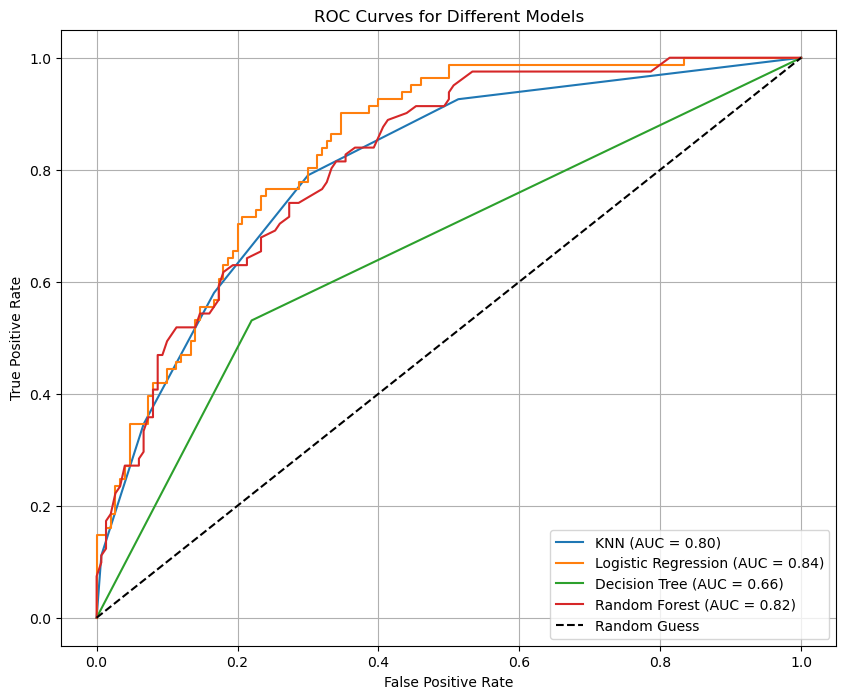

In [12]:
# Plot ROC curves for each model to visualize AUC
plt.figure(figsize=(10, 8))

# KNN ROC curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn.predict_proba(X_test_scaled)[:, 1])
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {knn_auc:.2f})')

# Logistic Regression ROC curve
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {log_reg_auc:.2f})')

# Decision Tree ROC curve
fpr_decision_tree, tpr_decision_tree, _ = roc_curve(y_test, decision_tree.predict_proba(X_test)[:, 1])
plt.plot(fpr_decision_tree, tpr_decision_tree, label=f'Decision Tree (AUC = {decision_tree_auc:.2f})')

# Random Forest ROC curve
fpr_random_forest, tpr_random_forest, _ = roc_curve(y_test, random_forest.predict_proba(X_test)[:, 1])
plt.plot(fpr_random_forest, tpr_random_forest, label=f'Random Forest (AUC = {random_forest_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

The ROC curves for the different models have been successfully generated. Here are the AUC values for each model:

* K-Nearest Neighbors (KNN): AUC = 0.80
* Logistic Regression: AUC = 0.84
* Decision Tree: AUC = 0.66
* Random Forest: AUC = 0.82

The ROC curves visually demonstrate the performance of each model in distinguishing between the classes. Logistic Regression has the highest AUC, indicating the best performance among the models tested.